In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data50.csv',index_col=0)

In [4]:
df.head(50)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.shape

(50, 5)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.isnull().sum().sort_values(ascending=False)

Profit             0
State              0
Marketing Spend    0
Administration     0
R&D Spend          0
dtype: int64

In [8]:
100*(df.isnull().sum()/df.isnull().count())

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [9]:
# we want to creat a table of missing values
missing=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count())
total=pd.concat([missing,percent], axis=1,keys=['Total','Percent'])
print(total)

                 Total  Percent
Administration       0      0.0
Marketing Spend      0      0.0
Profit               0      0.0
R&D Spend            0      0.0
State                0      0.0


In [10]:
numeric=df.select_dtypes(include=[np.number])

In [11]:
numeric

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [12]:
categorical=df.select_dtypes(include=[np.object])

In [13]:
categorical


,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


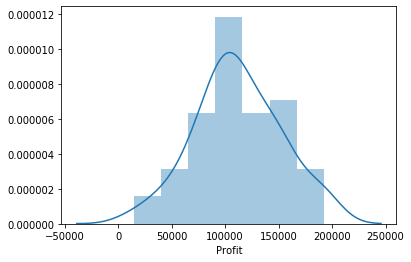

In [14]:
sns.distplot(df['Profit']);

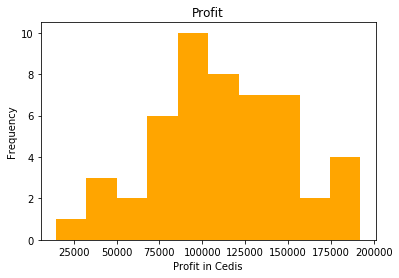

In [15]:
plt.figure(figsize=(6,4))
plt.hist(df['Profit'],color='orange')
plt.title('Profit')
plt.ylabel('Frequency')
plt.xlabel("Profit in Cedis")
plt.show()

In [16]:
target=np.log(df['Profit'])

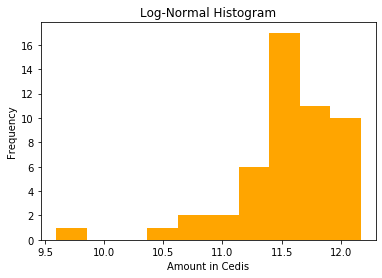

In [17]:
plt.figure(figsize=(6,4))
plt.hist(target, color='orange')
plt.title('Log-Normal Histogram')
plt.xlabel('Amount in Cedis')
plt.ylabel('Frequency')
plt.show()

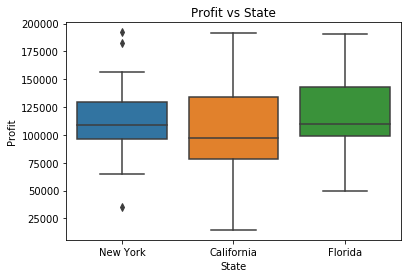

In [18]:
sns.boxplot(x='State',y='Profit',data=df)
plt.title('Profit vs State')
plt.show()

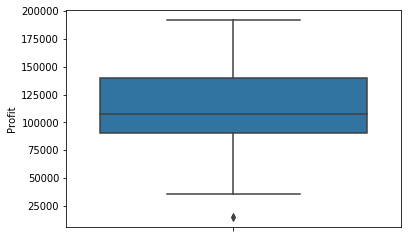

In [19]:
sns.boxplot(df['Profit'],orient='v')

In [20]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [21]:
# Spllit the data into training and test set

In [43]:
y.shape

(50,)

In [44]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [45]:
labelencoder= LabelEncoder()
X[:,3]= labelencoder.fit_transform(X[:, 3])

In [46]:
onehotencoder= OneHotEncoder(categorical_features=[3])
X= onehotencoder.fit_transform(X).toarray()


In [47]:
X.shape

(50, 54)

In [48]:
correlation=numeric.corr()

In [49]:
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


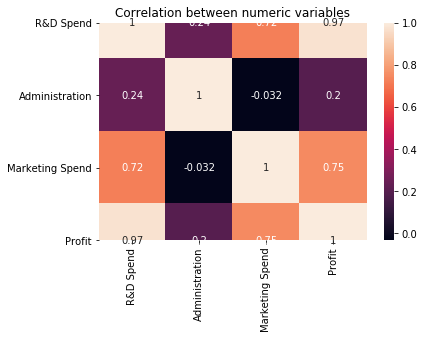

In [50]:
sns.heatmap(correlation,annot=True)
plt.title('Correlation between numeric variables');

In [51]:
columns=["R&D Spend", "Administration", "Marketing Spend", "Profit"]


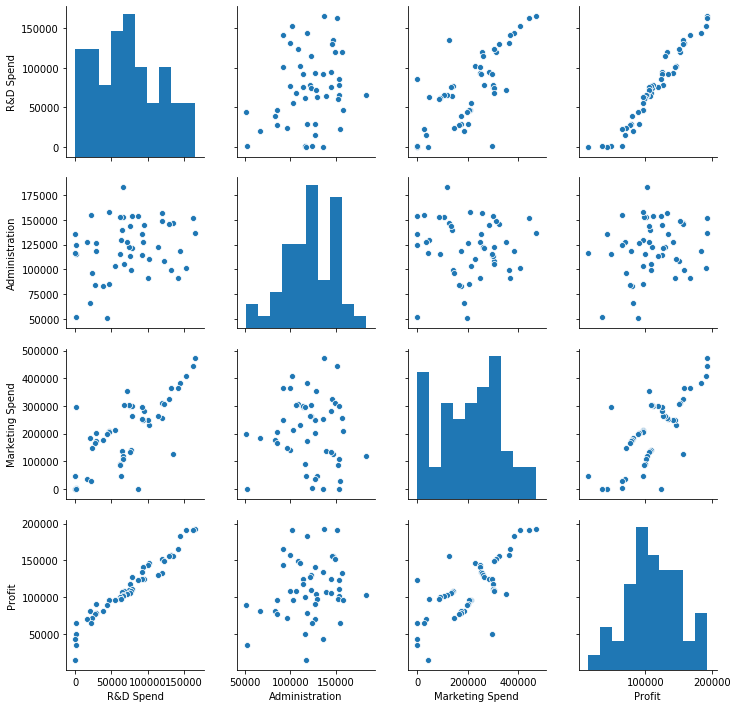

In [52]:
sns.pairplot(df[columns])

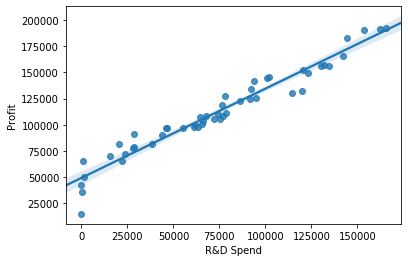

In [53]:
plt.figure(figsize=(6,4))
sns.regplot(df['R&D Spend'],df['Profit'])
plt.show()

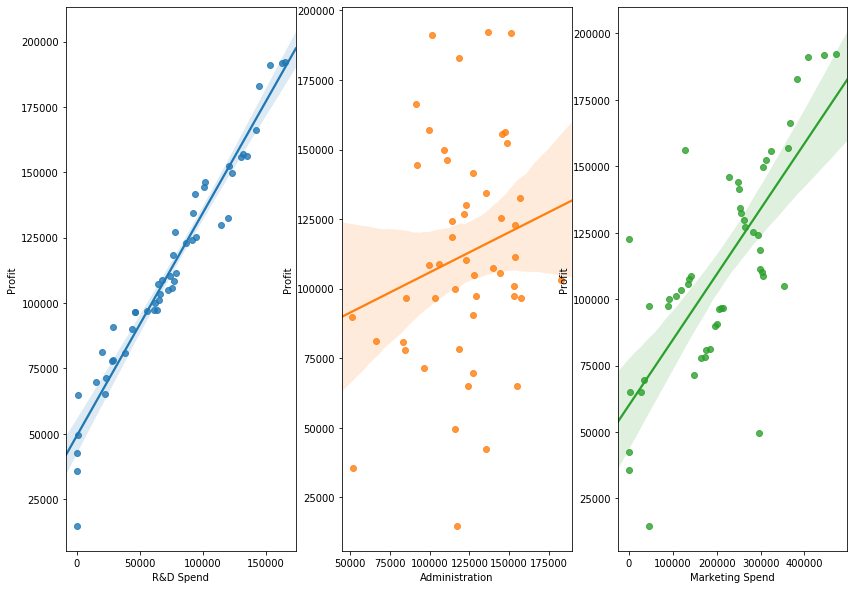

In [54]:
fig,axs=plt.subplots(ncols=3,figsize=(14,10))
sns.regplot(df['R&D Spend'],df['Profit'],ax=axs[0])
sns.regplot(df['Administration'],df['Profit'],ax=axs[1])
sns.regplot(df['Marketing Spend'],df['Profit'],ax=axs[2])

In [55]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7,random_state=100)


In [110]:
X_train.shape

(35, 54)

In [111]:
y_train.shape

(35,)

In [112]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [113]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
y_train.shape

(35,)

In [115]:
pred=lm.predict(X_test)

In [116]:
print(lm.intercept_)

29714.347192198184


In [117]:
print(lm.coef_)


[-2.35309188e+04 -1.08022515e+04  8.84010660e-08 -8.17432894e+04
 -1.89027958e-07  3.26155714e-07 -1.29016293e+04 -4.00577846e-08
 -1.43588462e+04 -1.71245119e-07 -2.22399873e+04 -9.74217611e+03
 -1.03042112e-07 -6.25664779e+03 -2.36619233e+04 -3.01552063e-07
  1.92348408e+03  1.55378142e+04  2.26560470e+04  8.79173370e+03
  1.05233771e+03 -7.27595761e-12 -2.13425722e+04 -4.35858587e+04
 -2.42954669e+04  3.38733272e+03 -1.09139364e-11  1.64706436e+04
  4.84167573e+03 -3.25966109e+04  4.70196637e+04 -3.63797881e-12
  1.08105784e+04  1.77788390e+04 -1.21391501e+04  0.00000000e+00
  3.18243519e+04  3.59368600e+03 -1.12894724e+03  7.05907763e+03
  2.20962309e+04  9.89092496e+03  0.00000000e+00  0.00000000e+00
  2.62974205e+04  3.01354045e+04  3.88673847e+04  2.02916449e+04
  0.00000000e+00 -2.58872410e+03  7.14945962e+02  1.87377814e+03
  2.87719943e-01  2.27124970e-01]


In [118]:
list(zip(df,lm.coef_))

[('R&D Spend', -23530.91880495537),
 ('Administration', -10802.251499319658),
 ('Marketing Spend', 8.840106602292508e-08),
 ('State', -81743.28938779955),
 ('Profit', -1.8902795773101388e-07)]

In [119]:
print('R squre is {}:'.format(lm.score(X_test,y_test)))

R squre is0.7438221855624187:


In [120]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [121]:
print("MAE:", metrics.mean_absolute_error(pred, y_test))

MAE: 16644.671120389252


In [122]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(pred, y_test)))

RMSE: 21953.222045406845


In [123]:
# end of this project